# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

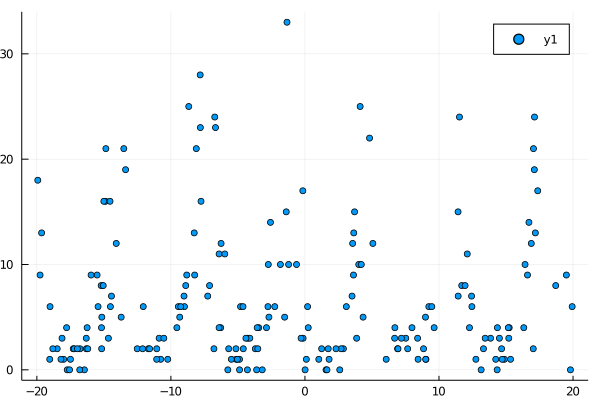

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -572.7141071937442
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.108623 seconds (7.46 M allocations: 475.238 MiB, 98.07% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.390212623665869, 0.4641172676420066, 0.4228631414637594, 0.43735096320868083, 0.36854950572342865, 0.5341800693874528, 0.2611364914740965, 0.3001572974898637, 0.26953874704121117, 0.5257976733348533  …  0.3999758844818798, 0.3172681448367185, 0.18799821346999102, 0.4698594038327561, 0.19933064126560077, 0.26088131262129616, 0.5517087263591748, 0.2549790041580713, 0.3475462619517775, 0.7658888774676376], θ = [3.4562550803135363, 2.947284027527701, 3.9414424518789386, 3.44525804950468, 3.9553303975543255, 6.349722989855725, 4.474601086705839, 4.962795818258536, 4.472952311489505, 3.910324000100957  …  3.947512634232973, 3.4709336471130112, 5.483858023262641, 2.945999871873889, 4.485159199520876, 6.960567236043437, 3.9015351751891, 2.9838514076701936, 3.465190447427397, 3.3383859556609132]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTuple(

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -762.9137089339661
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.026808 seconds (4.37 M allocations: 308.900 MiB, 96.03% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.416871970008641) infered by Analytic Variational Inference , (local_vars = (c = [0.6244878940528735, 0.7038027839860339, 0.6431310723439094, 0.6532379504587034, 0.26934159924933526, 0.49908174785412807, 0.14596486258974384, 0.16945462626224744, 0.46101142277640733, 0.731302362185345  …  0.6171217641883735, 0.4972287156894905, 0.2992147616191437, 0.6839475981367722, 0.1825606147569349, 0.2874184751655721, 0.762052014239566, 0.3982636840470154, 0.5487545180661603, 0.9259746537314267], θ = [5.471166080082929, 5.076543018873561, 5.950839635603688, 5.477327281030632, 4.638121231153537, 6.618453076934166, 5.465176468547698, 5.860129701194857, 6.234337621211776, 6.036640701050181  …  5.924225548126414, 5.274796915394625, 6.986107035845931, 5.008536483622546, 5.7430664538356755, 8.31903217588767, 6.077540190113539, 4.638843324047521, 5.355957228366604, 5.713442915413665], γ = [9.29565425932918, 9.568767478314784, 9.309107517549123

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

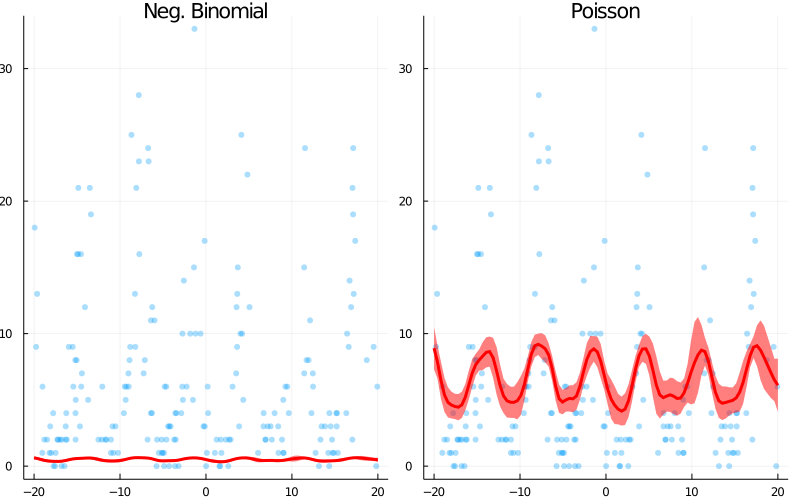

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*